<a href="https://colab.research.google.com/github/comp-neural-circuits/plasticity-workshop/blob/main/hebbian_plasticity_in_action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hebbian plasticity in action

In this part of the tutorial, we will see how hebbian plasticity acts in numerical simulations and we will consider more biologically-motivated examples.

In Section 1, we will implement an "on the fly" version of Hebbian rules 

In Section 2, we will use hebbian plasticity and L-events to form receptive fields.

In [ ]:
import sys, json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import norm

plt.rcParams['font.size'] = 15

# Section 1: Updating weights "on the fly"

In the last part, we simulated weight dynamics by first calculating the correlation or covariance of the input. However, in biology and in numerical simulations, we don't have this long time information of how inputs are correlated. Instead, we know the firing rate of neurons at that time. Therefore we use the basic formulation of hebbian plasticity that depends on presynaptic rate $r_{\text{pre}}(t)$ and postsynaptic rate $r_{\text{post}}(t)$:

\begin{equation}
    \tau \;\dot{w} = \; r_{\text{post}}(t) \; r_{\text{pre}}(t) 
\end{equation}

In the next section, we will go over how weights are updated at each time step by calculating $ \Delta w$ as a function of presynaptic or postsynaptic rate.

### Simple Hebbian

The most basic form of Hebbian plasticity is the equation we saw above. The weight change for the synapse between the presynaptic neuron and the postsynaptic neuron is expressed as:
\begin{equation}
\Delta w_j(t) = \gamma \; r_\text{post}(t) \; r_\text{pre}(t)
\end{equation}

In [ ]:
gamma = 1.                             # global parameter gamma, let's assume this to be 1. 

def hebbian_1synapse(r_pre, r_post):
    dw = gamma  # Enter equation here
    return dw

We can give different presynaptic and postsynaptic rates to this equation and $\Delta w$ (`dw` in the code) will always be postive, which means we will always have LTP.

**Exercise**: Plot $ \Delta w$ for a range of presynaptic rates from 0. to 1. 

In [ ]:
r_post = 1.
rp_range =   # Enter presynaptic rates range as: np.arange(lower_limit, higher_limit, step)
dw_all = np.zeros(np.shape(rp_range))

for i,rp in enumerate(rp_range):
    dw = hebbian_1synapse(rp, r_post)
    dw_all[i] = dw

fig = plt.figure()
plt.plot(rp_range, dw_all, 'b--')
plt.hlines(0, rp_range[0], rp_range[-1], 'k', '-')
plt.xlabel(r'Presynaptic rate, $r_{\mathrm{pre}}$')
plt.ylabel('change in weight, $\Delta w$')
plt.show()

**Exercise**: Plot $ \Delta w$ for a range of presynaptic and postynaptic rates.

In [ ]:
rp_range =                       # Enter presynaptic rates range
r_post_range =                   # Enter postsynaptic rates range
dw_all = np.zeros((len(rp_range), len(r_post_range)))

for i,rp in enumerate(rp_range):
    for j,r_post in enumerate(r_post_range):
        dw = hebbian_1synapse(rp, r_post)
        dw_all[i, j] = dw

fig = plt.figure()
ax = plt.gca()
im = ax.imshow(dw_all, origin='lower', cmap='RdBu', vmin=-np.max(dw_all), vmax=np.max(dw_all))
cbar = plt.colorbar(im, ax=ax, ticks=[-np.max(dw_all), 0., np.max(dw_all)])
cbar.ax.set_yticklabels(['LTD', 'No change', 'LTP'])
plt.xlabel(r'Postsynaptic rate, $r_{\mathrm{post}}$')
plt.ylabel(r'Presynaptic rate, $r_{\mathrm{pre}}$')
plt.show()

### Hebbian with threshold

We can add a threshold to the Hebbian plasticity equation to introduce LTD at some points. Let's put the threshold in the presynaptic term and the equation is: 
\begin{equation}
    \Delta w_j(t) = \gamma \; r_\text{post}(t) \; \left(r_\text{pre}(t)-\theta \right)
\end{equation}

In Section 2, we will use this form of hebbian plasticity along with L-events to form receptive fields. 

**Exercise**: What should the `dw =` term here be? 

In [ ]:
def hebbian_threshold_1synapse(r_pre, r_post, theta):
    dw = gamma     # Enter equation here
    return dw

In this case, $\Delta w$ will change sign based on the presynaptic rate. 

**Exercise**: Plot $ \Delta w$ for a range of presynaptic rates for $ \theta = 0.5 $ and then for different values of $ \theta $

In [ ]:
r_post = 1.
rp_range = np.arange(0., 1., 0.1)
dw_all = np.zeros(np.shape(rp_range))
theta = 0.5

fig = plt.figure()
plt.hlines(0, rp_range[0], rp_range[-1], 'k', '-')
plt.xlabel(r'Presynaptic rate, $r_\mathrm{pre}$')
plt.ylabel('change in weight')

# Run the theta loop
#for theta in []:
for i,rp in enumerate(rp_range):
    dw = hebbian_threshold_1synapse(rp, r_post, theta)
    dw_all[i] = dw

plt.plot(rp_range, dw_all, '--', label='theta = {}'.format(theta))

plt.legend()
plt.show()

**Exercise**: Plot $ \Delta w$ for a range of presynaptic and postynaptic rates. Try changing $\theta$ to see how the boundary of LTP vs LTD shifts. 

In [ ]:
rp_range = np.arange(0., 1., 0.1)
r_post_range = np.arange(0., 1., 0.1)
dw_all = np.zeros((len(rp_range), len(r_post_range)))

theta =  # Enter theta here

for i,rp in enumerate(rp_range):
    for j,r_post in enumerate(r_post_range):
        dw = hebbian_threshold_1synapse(rp, r_post, theta)
        dw_all[i, j] = dw

fig = plt.figure()
ax = plt.gca()
im = ax.imshow(dw_all, origin='lower', cmap='RdBu', vmin=-np.max(dw_all), vmax=np.max(dw_all))
cbar = plt.colorbar(im, ax=ax, ticks=[-np.max(dw_all), 0., np.max(dw_all)])
cbar.ax.set_yticklabels(['LTD', 'No change', 'LTP'])
plt.xlabel(r'Postsynaptic rate, $r_{\mathrm{post}}$')
plt.ylabel(r'Presynaptic rate, $r_{\mathrm{pre}}$ ' )
plt.show()

**Optional Exercise**: How would this distribution of LTP and LTD change if we have threshold in postsynaptic rate, or if we have the threshold in both pre- and post-synaptic rate part? 

Try modifying the function according to these two equations and see the distribution of LTP and LTD. 

\begin{align}
    \Delta w_j(t) =& \; \gamma \; \left(r_\text{post}(t)-\theta \right) \; r_\text{pre}(t) \\ 
    \Delta w_j(t) =& \; \gamma \; \left(r_\text{post}(t)-\theta \right) \; \left(r_\text{pre}(t)-\theta \right)
\end{align}

In [ ]:
def hebbian_threshold_1synapse(r_pre, r_post, theta):
    dw = gamma  # Enter equation here
    return dw

rp_range = np.arange(0., 1., 0.1)
r_post_range = np.arange(0., 1., 0.1)
dw_all = np.zeros((len(rp_range), len(r_post_range)))
theta = 0.5     # Try different theta here 

for i,rp in enumerate(rp_range):
    for j,r_post in enumerate(r_post_range):
        dw = hebbian_threshold_1synapse(rp, r_post, theta)
        dw_all[i, j] = dw

fig = plt.figure()
ax = plt.gca()
im = ax.imshow(dw_all, origin='lower', cmap='RdBu', vmin=-np.max(dw_all), vmax=np.max(dw_all))
cbar = plt.colorbar(im, ax=ax, ticks=[-np.max(dw_all), 0., np.max(dw_all)])
cbar.ax.set_yticklabels(['LTD', 'No change', 'LTP'])
plt.xlabel('Postsynaptic rate, r_post')
plt.ylabel('Presynaptic rate, r_j')
plt.show()

### Bienenstock, Cooper, Munro (BCM) rule

The BCM rule ([from Bienenstock, Cooper, Munro, 1982](http://www.jneurosci.org/content/2/1/32.short)) is another form of Hebbian plasticity with an adaptive threshold. In this rule, the adaptive threshold is in the postsynaptic term. 

\begin{align}
 \Delta w_j(t) =& \gamma \; r_\text{post}(t) \; \left(r_\text{post}(t)-\theta(t) \right)\;r_\text{pre}(t) \\ 
\end{align}

According to this rule, $ \theta$ is updated at every time point, and the rates converge to the target rate $ r_0$:
\begin{equation}
    \tau_{\theta}\; \dot{\theta} (t)  = - θ(t) + \frac{\bar{r}_{\text{post}}^{2}}{r_0}
\end{equation}

Here we simplify this expression, assuming that $\theta(t)$ changes at a much faster timescale compared to the weights, i.e. $ \tau_{\theta} \ll \tau_w$. Therefore we replace $\theta(t)$ with its stationary-state value:

$$
\theta(t) \approx \theta(t=\infty) = \frac{\bar{r}_{\text{post}}^{2}}{r_0}
$$

To observe the effect of different $ \theta$, we will vary the value of 
$\bar{r}_{\text{post}}$.


**Exercise**: Write the function for BCM weight update. 

In [ ]:
def bcm_1synapse(r_pre, r_post, r_bar, r0):
    theta = r_bar**2 / r0
    dw = gamma   # Enter equation here
    return dw

Here, the threshold is in the postsynaptic rate term, so the $\Delta w$ will change with postsynaptic rates $\bar{r}_{\text{post}}$

**Exercise**: Plot $ \Delta w$ as a function of the postsynaptic rate $\bar{r}_{\text{post}}$ for $ \theta = 0.5 $. Then, plot the same for different values of theta. 

Hint: What should be the value of $\bar{r}_{\text{post}}$ to get $ \theta = 0.5 $?

In [ ]:
rp = 1.
r_post_range = np.arange(0., 3., 0.1)
dw_all = np.zeros(np.shape(r_post_range))
r0 = 1. 
r_bar =  # Enter the r_bar here

fig = plt.figure()
plt.hlines(0, r_post_range[0], r_post_range[-1], 'k', '-')
plt.xlabel('Postsynaptic rate, $r_{\mathrm{post}}$')
plt.ylabel('Change in weight, $\Delta w$')

# Run r_bar loop here
#for r_bar in []:
for i,r_post in enumerate(r_post_range):
    dw = bcm_1synapse(rp, r_post, r_bar, r0)
    dw_all[i] = dw

plt.plot(r_post_range, dw_all, '--', label=r"$\bar{r}_{\mathrm{post}}=$ "+"{}".format(r_bar))

plt.legend()
plt.show()

**Exercise**: Plot $ \Delta w$ for a range of presynaptic and postynaptic rates. Try changing $\theta$ to see how the boundary of LTP vs LTD shifts. 

In [ ]:
rp_range = np.arange(0., 3., 0.1)
r_post_range = np.arange(0., 3., 0.1)
dw_all = np.zeros((len(rp_range), len(r_post_range)))
r0 = 1.
r_bar = 1.1 # Try different values of r_bar here

for i,rj in enumerate(rp_range):
    for j,r_post in enumerate(r_post_range):
        dw = bcm_1synapse(rp, r_post, r_bar, r0)
        dw_all[i, j] = dw

fig = plt.figure()
ax = plt.gca()
im = ax.imshow(dw_all, origin='lower', cmap='RdBu', vmin=-np.max(dw_all), vmax=np.max(dw_all))
cbar = plt.colorbar(im, ax=ax, ticks=[-np.max(dw_all), 0., np.max(dw_all)])
cbar.ax.set_yticklabels(['LTD', 'No change', 'LTP'])
plt.xlabel('Postsynaptic rate, $r_{\mathrm{post}}$')
plt.ylabel('Presynaptic rate,  $r_{\mathrm{pre}}$')
plt.show()

# Section 2: Using Hebbian plasticity to form Receptive Fields

In this section, we will simulate the formation of receptive fields from one layer to another, we can consider them to be Thalamus and Cortex.

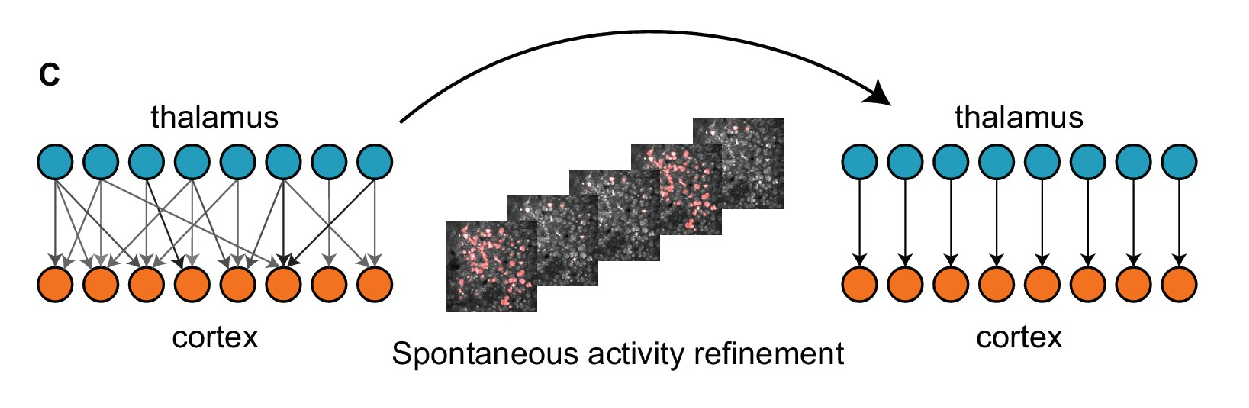

We will start with initial random connections (generated by the function `initial_biased_weights`) and apply hebbian plasticity with threshold. In terms of the connectivity matrix, this process will look like this:

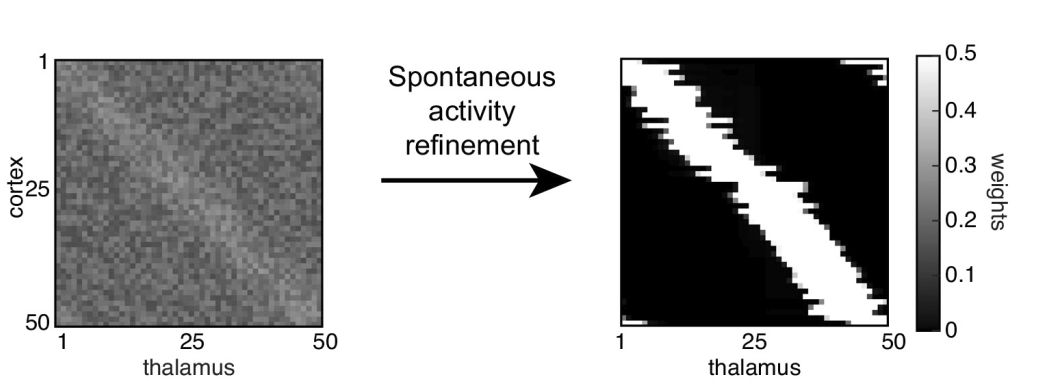

First, we set up some utility functions and visualization tools.

In [ ]:
# utility functions

def setup_simulation():
    t = np.arange(0., params['t_sim'], params['dt'])
    st = np.arange(0., params['t_sim'], params['sdt'])
    rT = np.zeros((params['n0'], len(t)))
    rC = np.zeros((params['n1'], len(t)))
    wCT = np.zeros((params['n0']*params['n1'], len(st))) # store weights only sdt time steps
    return [t, st, rT, rC, wCT]   

def rescale_weights(w):
    w[w < params['w_low']] = params['w_low']
    w[w > params['w_high']] = params['w_high']
    return w

def initial_biased_weights():
    # bias = the biased w is weighted how much, between 0-1
    w = np.zeros((params['n1'], params['n0']))    # we specify w[post, pre] = weight
    x = np.arange(params['n1'])
    for i in range(params['n0']):
        d = norm.pdf(x, params['n1']/2, params['spread'])
        d1 = d*(1/np.max(d))
        e = np.random.random((len(x)))
        w[i,:] = np.roll(params['bias']*d1 + (1-params['bias'])*e, -int(params['n1']/2 - i))
    w[w < 0.] = 0.
    x = params['x']
    w = (params['w_high'] * params['init_w_scale'] * x) + (w * params['w_high'] * params['init_w_scale'] * (1-x))
    #w = w * params['w_high'] * params['init_w_scale']
    return w

# Visualization of results functions

def show_rates(rT, rC, t1=0., t2=5000.):
    fig = plt.figure(figsize=[8,4])
    gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    id1, id2 = int(t1/params['dt']), int(t2/params['dt'])

    ax0 = fig.add_subplot(gs[0])
    im0 = ax0.imshow(rT[:,id1:id2], aspect='auto')
    ax0.set_title('Rate of Thalamus neurons')
    ax0.set_xlabel('Time (ms)')
    ax0.set_ylabel('Thalamus Neuron')
    plt.colorbar(im0, ax=ax0, label='Rate')

    ax1 = fig.add_subplot(gs[1])
    im1 = ax1.imshow(rC[:,id1:id2], aspect='auto')
    ax1.set_title('Rate of Cortex neurons')
    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Cortex Neuron')
    plt.colorbar(im1, ax=ax1, label='Rate')

    fig.tight_layout()
    return

def show_weight_evolution(wCT, nsamples, t):
    fig = plt.figure()
    ax = plt.gca()
    sN = np.random.choice(np.arange(params['n0']*params['n1']), nsamples).astype(int)    # choose nsamples number of synaptic weights to show
    ax.plot(t, wCT[sN, :].T, '-')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Synaptic weights')
    lw = (params['w_high'] - params['w_low'])*0.1
    ax.set_ylim([params['w_low']-lw, params['w_high']+lw])
    return

def show_weight_matrix_at_time(wCT, t3=0., title=''):
    fig = plt.figure()
    ax = plt.gca()
    id3 = int(t3/params['sdt'])
    im = ax.imshow(wCT[:,id3].reshape((params['n1'], params['n0'])), origin='lower', cmap='gray', vmin=params['w_low'], vmax=params['w_high'])
    ax.set_xlabel('Presynaptic')
    ax.set_ylabel('Postsynaptic')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)
    plt.colorbar(im, ax=ax, label='Synaptic weight')
    plt.show()
    return 

def show_weight_matrix(wCT, title=''):
    fig = plt.figure()
    ax = plt.gca()
    im = ax.imshow(wCT.reshape((params['n1'], params['n0'])), origin='lower', cmap='gray', vmin=params['w_low'], vmax=params['w_high'])
    ax.set_xlabel('Presynaptic')
    ax.set_ylabel('Postsynaptic')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)
    plt.colorbar(im, ax=ax, label='Synaptic weight')
    plt.show()
    return 

## The main simulation function

We will numerically simulate this network with rate based neurons and plastic synaptic weights. We have two layers Thalamus (T) and Cortex (C), and we denote the rate of neurons in the layers as $r_t$ and $r_c$, respectively. We denote the weights of synapses from thalamus to cortex as $w_{ct}$. 

At every time step, we update the rates and weights of each neuron according to these equations:

\begin{align}
    r_t(i, t) =& \; 
    \begin{cases}
        a & \text{if neuron $i$ is active at time $t$} \\ 
        0 & \text{otherwise}
    \end{cases} 
    \\
    \tau_m \; \dot{r}_c =& \; - r_c + w_{ct} r_t \\
    \tau_w \; \dot{w}_{ct} =& \; r_c (r_t - \theta)
\end{align}


At each time point, we will update the rates of neurons and synaptic weights according to these equations. The update is discretized according to Euler's method, that is, for a small time interval $\Delta t$ we have:
$$
{r}_c(t+\Delta t) = \frac{\Delta t}{\tau_m} \left( \; - r_c(t) + w_{ct} r_t(t) \right) \text{ $\ldots$ and the equivalent for $w_{ct}$}
$$

We run the main simulation with the function `run_simulation`. In this function, we first setup the arrays which store rates and weights. As weights will change slower than rates, we record weights only every 1000 ms. We start with an initial random weight matrix, with a small bias along the diagonal. Then, at each time point we update the rate and weights. We update the rate of thalamus neurons if an L-event is occurring at that time or not. 

In [ ]:
# Main simulation function

def run_simulation(plasticity_dw, input):

    input_times = input
    [t, st, rT, rC, wCT] = setup_simulation()
    
    # set initial weights
    wCT[:,0] = initial_biased_weights().reshape(-1)
    L_dur_counter = 0.

    for _i, _t in enumerate(t):
        
        if _i == 0.:
            wct1 = wCT[:,0]
            continue
        
        # state at time _t-1
        rt0, rc0 = rT[:,_i-1], rC[:,_i-1]
        wct0 = wct1 #wCT[:,_i-1]


        # specify L-event input
        if _t in input_times and L_dur_counter == 0.:                           # denotes the start of L-event
            rt0[:] = 0.                            # remove the old input
            amp, dur, pct, neur = define_L_event() # define L-event at this point
            rt0[neur] = amp                        # set the new input
            L_dur_counter = dur                    #
          
        if L_dur_counter > 0.:
            L_dur_counter = np.round(L_dur_counter - params['dt'], 1)           # reduce counter by dt to track how much L event has passed. 
            if L_dur_counter <= 0.:                                             # denotes end of L-event
                rt0[:] = 0.                                                     # if L event has ended, then we remove the input by setting rX to 0


        # update state to time _t
        rt1 = rt0
        rc1 = rc0 + (params['dt']/params['taum']) * (-rc0 + np.dot(wct0.reshape(params['n1'], params['n0']), rt0))
        wct1 = wct0 + plasticity_dw(rt1, rc1)
        wct1 = rescale_weights(wct1)

        # store
        rT[:,_i], rC[:,_i] = rt1, rc1
        if _t in st:                                     # store weights at only some time points
            _si = int(np.where(st == _t)[0][0])
            wCT[:,_si] = wct1
        
    return [t, st, rT, rC, wCT]

## Parameters of the simulation

We define some global parameters for the simulation, like the size of two layers T and C, and the time constants for rates and weights. Here, we also enter parameters for L-events such as their amplitude, duration, frequency and size. 

In [ ]:
# define parameters

params = {
    'n0' : 50,               # number of presynaptic neurons
    'n1' : 50,               # number of postsynaptic neurons
    'taum' : 10.,            # tau for rate equation (ms)
    'tauw' : 50000.,         # tau for synaptic weight equation (ms)
    't_sim' : 500000.,       # Time of simulation (ms)    
    'dt' : 0.1,              # Time step for simulation
    'sdt' : 1000.,           # Time step for storing/recording weights
    'w_low' : 0.,            # upper bound for synaptic weights
    'w_high' : 0.5,           # lower bound for synaptic weights
    'bias' : 0.6,            # how biased initial weight matrix is
    'spread' : 5,            # the width of initial biased matrix
    'init_w_scale' : 0.4,    # the ratio of maximum initial weight, to w_high
    'L_amp' : 1.,            # amplitude of L-event (a in the equation for rX)
    'L_dur' : 150.,          # Duration of L-events (ms)
    'L_size' : 0.6,          # constant L-event size (ratio)
    'L_size_low' : 0.2,      # lowest L-event size (ratio)
    'L_size_high' : 0.8,     # highest L-event size (ratio)
    'L_iei' : 1500.,         # inter event interval for L-events or any input
    'theta' : 0.6,           # threshold for threshold Hebbian rule
    'x' : 0.3                # 
}

## Input to the network: L-events

As you saw in the lecture, spontaneous activity manifests in the cortex as local L-events, generated in the sensory periphery, and global H-events, generated within the cortex. Right now, we will use L-events to drive the network and form receptive fields from layer X to Y.


First, we define at what time the L-events will start in the network in the function `generate_L_events_times()`. This gives us a list of times according to a poisson process with the specified inter event interval. 


Next, we define the properties of each L-event in the function `define_L_event()`. Each L-event can be described by the following properties:
1. amplitude
2. duration
3. number of participating neuron
4. identity of participating neurons

In this function, we can decide if we want to draw the properties of L-event from a distribution or just keep them constant. For example, in the code below, you'll see we have kept the amplitude and size of L-events constant, but the duration is drawn from a normal distribution. 

This function is called from `run_simulation()` every time a new L-event starts, which is every time listed in the output of `generate_L_events_times()`. It returns the above mentioned properties of L-events and the rates of thalamus are appropriately updated (see the part in `run_simulation()` under the comment 'specify L-event input')

**Optional Exercise**: Modify `define_L_event()` to draw the amplitude and size from the following distributions:


In [ ]:
# input: L-events

def generate_L_events_times(t_end, inter_event_interval):
    # generate sequence of L-event start times
    L_events_times = []
    _pt = 0. 
    while _pt < t_end:
        _pt += np.random.exponential(inter_event_interval)
        L_events_times.append(round(_pt, 1))
    return L_events_times

def define_L_event():
    # for one L-event, specify the L-amp, L-neurons, L-dur
    # here we can add distributions for amplitude and participation ration of L-events just like we have done for the duration. 
    amp = params['L_amp']                                                                         # amplitude
    dur = round(np.random.normal(params['L_dur'], params['L_dur']/10.), 1)                        # duration
    pct = params['L_size']                                                                        # participation ratio, constant
    #pct = np.round(np.random.uniform(low=params['L_size_low'], high=params['L_size_high']), 2)   # participation ratio, varied from pct_low to pct_high
    sN = np.random.choice(np.arange(params['n0']), 1)
    neur = np.roll(np.arange(params['n0']), -sN)[:int(pct*params['n0'])]                          # stimulated neurons
    return amp, dur, pct, neur

## Hebbian plasticity with threshold

We use the threshold hebbian plasticity,which you'll recall from Section 1. In the current model, cortical neurons are presynaptic, and thalamic neurons are postsynaptic, therefore the equation is:
\begin{equation}
    \tau_w \, \dot{w}_{ct} = \; r_{c} (r_{t} - \theta)
\end{equation}

**Exercise**: Write the weight update part `dw = ` according to the equation.  

In [ ]:
# Hebbian with threshold

def hebbian_threshold(rt, rc, theta=params['theta']):
    rt = rt.reshape(1, params['n0'])
    rc = rc.reshape(params['n1'], 1)

    # Enter the plasticity rule here:
    dw = (params['dt']/params['tauw'])  # Enter equation here as np.dot()

    dw = dw.reshape(-1)  
    return dw

Let's run the simulation. We will first specify the times when L-events start `input_times`, the theta to use for plasticity, and then use `run_simulation()` while specifying which plasticity function to use.

**Exercise**: Run the simulation with $\theta = 0.5$ and visualize the initial and final weight matrix. 

In [ ]:
# main
if 't' in globals():
    del([t, st, rT, rC, wCT])

params['theta'] =                 # Enter the right value of theta here

input_times = generate_L_events_times(params['t_sim'], params['L_iei'])
[t, st, rT, rC, wCT] = run_simulation(hebbian_threshold, input_times)

In [ ]:
# visualize output

show_weight_matrix_at_time(wCT, 0., 'Initial weight matrix')
show_weight_matrix_at_time(wCT, params['t_sim']-1, 'Final weight matrix')
#show_rates(rT, rC, 0., 1000.)
#show_weight_evolution(wCT, 100, st)

The code for next two exercises takes a long time to run and converge to steady state weights. So, you can start them and look at the results in an hour. 

## Effect of plasticity threshold on receptive field formations

**Exercise**: Try the following values of $\theta$: 0.2, 0.5, 0.8 to see if receptive fields are formed in all cases. 

In [ ]:
# code to simulate multiple theta and plot the final weight matrix

params['t_sim'] = 2000000.

# Enter theta values here
for theta in []:
    params['theta'] = theta

    if 't' in globals():
        del([t, st, rT, rC, wCT])
      
    input_times = generate_L_events_times(params['t_sim'], params['L_iei'])
    [t, st, rT, rC, wCT] = run_simulation(hebbian_threshold, input_times)
    
    show_weight_matrix_at_time(wCT, params['t_sim']-1, 'Final weight matrix, theta = {}'.format(theta))

*Bonus:*
The final weights are determined by two factors: plasticity and the input. We  already saw how the plasticity rule and its parameters (in this case, $\theta$) affect the final stable weights. Now let's try changing the input a little bit. 

**Optional Exercise**: Set the value of size of L-events, given by `params['L_size']` to these values: 0.4, 0.6, 0.8 and observe the effect on the final weight matrix. 

In [ ]:
# code to simulate multiple L_size and plot final weight matrix

# Enter L-size values here
for L_size in []: 
  
    params['L_size'] = L_size
    
    if 't' in globals():
        del([t, st, rT, rC, wCT])
    
    input_times = generate_L_events_times(params['t_sim'], params['L_iei'])
    [t, st, rT, rC, wCT] = run_simulation(hebbian_threshold, input_times)
    
    show_weights_matrix_at_time(wCT, params['t_sim']-1, 'Final weight matrix, L_size = {}'.format(L_size))